In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('archive/HAM10000_metadata.csv')
data

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


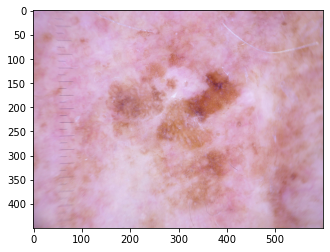

In [3]:
img = Image.open("archive/HAM10000_images_part_1/ISIC_0027419.jpg")
plt.imshow(img) 

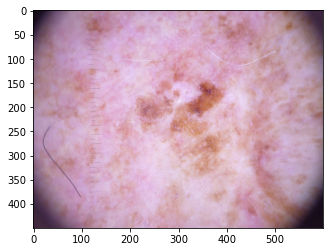

In [4]:
img = Image.open("archive/HAM10000_images_part_1/ISIC_0025030.jpg")
plt.imshow(img) 

In [5]:
data.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [6]:
"""Classes are imbalanced"""
data["dx"].value_counts() 

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [8]:
"""~66% of the samples belong to 1 of the 7 classes"""
data["dx"].value_counts() / np.sum(data["dx"].value_counts()) * 100

nv       66.949576
mel      11.113330
bkl      10.973540
bcc       5.132302
akiec     3.265102
vasc      1.417873
df        1.148278
Name: dx, dtype: float64

In [9]:
data["sex"].value_counts() / np.sum(data["sex"].value_counts()) * 100

male       53.979031
female     45.451822
unknown     0.569146
Name: sex, dtype: float64

In [10]:
data["localization"].value_counts() / np.sum(data["localization"].value_counts()) * 100

back               21.887169
lower extremity    20.738892
trunk              14.018972
upper extremity    11.163255
abdomen            10.204693
face                7.438842
chest               4.063904
foot                3.185222
unknown             2.336495
neck                1.677484
scalp               1.278083
hand                0.898652
ear                 0.559161
genital             0.479281
acral               0.069895
Name: localization, dtype: float64

In [11]:
"""
Since the final output target is the diagnosis, we need to balanced our dataset so the diagnoses classes
are more balanced. We can start by first removing duplicates from dominant class but keeping them in minority classes.
"""

seen = set()
to_remove_indexes = set()
for index, row in data.iterrows():
    if row['dx'] == "nv" and row['lesion_id'] in seen:
        to_remove_indexes.add(index)
    if row['dx'] == 'nv':
        seen.add(row['lesion_id'])
    
rebalanced_data = data.drop(to_remove_indexes)
rebalanced_data["dx"].value_counts() / np.sum(rebalanced_data["dx"].value_counts()) * 100

nv       62.010788
mel      12.774016
bkl      12.613336
bcc       5.899231
akiec     3.753013
vasc      1.629749
df        1.319867
Name: dx, dtype: float64

In [12]:
"""
Another technique is to randomly over sample the minority classes with replacement, untill all the classes have
an equal representation.
"""

from imblearn.over_sampling import RandomOverSampler


x = np.array(rebalanced_data[["lesion_id", "image_id", "age", "sex", "localization"]])
y = np.array(rebalanced_data[["dx"]])
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(x, y)
unique, counts = np.unique(y_res, return_counts=True)
dict(zip(unique, counts))

{'akiec': 5403,
 'bcc': 5403,
 'bkl': 5403,
 'df': 5403,
 'mel': 5403,
 'nv': 5403,
 'vasc': 5403}